In [1]:
import re
import os
import numpy as np
import pandas as pd
from n_grams_classes import *

# Estrazione Degli NGRAMMI

In [2]:

# per creare la lista dei nomi dei file e la lista delle label sfrutto il fatto che so che la prima metà è sempre negativa, mentre la seconda metà è sempre positiva
file_names_train = [f'../data/_profiled/TED/train/{n}_0.conllu' for n in range(0,4000)] + [f'../data/_profiled/TED/train/{n}_1.conllu' for n in range(4000,8000)]
labels_train = [0]*4000 + [1] *4000 

file_names_test = [f'../data/_profiled/TED/test/{n}_0.conllu' for n in range(0,400)] + [f'../data/_profiled/TED/test/{n}_1.conllu' for n in range(400,800)]
labels_test = [0]*400 + [1] *400

In [3]:
def extract_ngrams(file_names:list, labels:list, element:str='lessico', type_:str='forma')-> list:
    # uso questa funzione per creare i ddiversi dataset di ngrammi. Estrae da unigrammi fino a 5-grammi di forma, lemma, pos, o carattere (cioè prefissi e suffissi)
    # l'effettiva estrazione degli ngrammi è svolta dalle classi definite in n_grams_classes.py 

    doc_list = []
    for filename in file_names:
        with open(filename, 'r') as f:
            lines = f.readlines()
        doc_list.append(Document(lines))


    set = Corpus(doc_list, labels)
    dict_1_grams = set.get_feature_dicts(element, type_, 1)
    dict_2_grams = set.get_feature_dicts(element, type_, 2)
    dict_3_grams = set.get_feature_dicts(element, type_, 3)
    dict_4_grams = set.get_feature_dicts(element, type_, 4)
    dict_5_grams = set.get_feature_dicts(element, type_, 5)

    # per ogni documento riunisco tutti i suoi dizionari di diversi ngrammi
    ngrams = []
    for i in range(len(file_names)):
        n_gram_dict = dict_1_grams[i] | dict_2_grams[i] | dict_3_grams[i] | dict_4_grams[i] | dict_5_grams[i]
        ngrams.append(n_gram_dict) 
    return ngrams

In [4]:
# forma
train_ngrams_forma = extract_ngrams(file_names_train, labels_train, 'lessico', 'forma')
test_ngrams_forma = extract_ngrams(file_names_test, labels_test, 'lessico', 'forma')

In [5]:
# lemma
train_ngrams_lemma = extract_ngrams(file_names_train, labels_train, 'lessico', 'lemma')
test_ngrams_lemma = extract_ngrams(file_names_test, labels_test, 'lessico', 'lemma')

In [6]:
# pos
train_ngrams_pos = extract_ngrams(file_names_train, labels_train, 'lessico', 'pos')
test_ngrams_pos = extract_ngrams(file_names_test, labels_test, 'lessico', 'pos')

In [7]:
# carattere
train_ngrams_carattere = extract_ngrams(file_names_train, labels_train, 'carattere', 'carattere')
test_ngrams_carattere = extract_ngrams(file_names_test, labels_test, 'carattere', 'carattere')

In [8]:
len(train_ngrams_forma), len(train_ngrams_lemma), len(train_ngrams_pos), len(train_ngrams_carattere)

(8000, 8000, 8000, 8000)

In [9]:
len(test_ngrams_forma), len(test_ngrams_lemma), len(test_ngrams_pos), len(test_ngrams_carattere)

(800, 800, 800, 800)

In [10]:
# controllo per sicurezza di non aver perso l'ordine dal file iniziale

with open('../data/discotex_1_ted_train.tsv', 'r') as f:
    lines = f.readlines()

lines[0:3]

['zBP_Qm4RLV8#32\t"Per questa cosa io chiedo aiuto a un signore che si chiama Watzlawick.\n',
 "E' uno psicologo, ed è uno che con un nome così, come minimo doveva occuparsi di semplificazione.\n",
 'Watzlawick ci propone questo gioco."\tLa nostra società, che non è più un puzzle, perché il puzzle si è rotto, potremmo dire che è un mosaico.\t0\n']

In [11]:
# la frase è la stessa, quindi sembra tutto corretto
train_ngrams_lemma[0], train_ngrams_forma[0]

({'L_1_per': 0.015151515151515152,
  'L_1_questo': 0.030303030303030304,
  'L_1_cosa': 0.015151515151515152,
  'L_1_io': 0.015151515151515152,
  'L_1_chiedere': 0.015151515151515152,
  'L_1_aiuto': 0.015151515151515152,
  'L_1_a': 0.015151515151515152,
  'L_1_uno': 0.09090909090909091,
  'L_1_signore': 0.015151515151515152,
  'L_1_che': 0.06060606060606061,
  'L_1_si': 0.045454545454545456,
  'L_1_chiamare': 0.015151515151515152,
  'L_1_Watzlawick': 0.030303030303030304,
  'L_1_.': 0.06060606060606061,
  'L_1_essere': 0.07575757575757576,
  'L_1_psicologo': 0.015151515151515152,
  'L_1_,': 0.07575757575757576,
  'L_1_e': 0.015151515151515152,
  'L_1_con': 0.015151515151515152,
  'L_1_nome': 0.015151515151515152,
  'L_1_così': 0.015151515151515152,
  'L_1_come': 0.015151515151515152,
  'L_1_minimo': 0.015151515151515152,
  'L_1_dovere': 0.015151515151515152,
  'L_1_occupare': 0.015151515151515152,
  'L_1_di': 0.015151515151515152,
  'L_1_semplificazione': 0.015151515151515152,
  'L_1_ci

In [14]:
test_ngrams_lemma[0], test_ngrams_forma[0]

({'L_1_se': 0.012658227848101266,
  'L_1_poi': 0.012658227848101266,
  'L_1_non': 0.0379746835443038,
  'L_1_volere': 0.012658227848101266,
  'L_1_andare': 0.02531645569620253,
  'L_1_da': 0.012658227848101266,
  'L_1_nessuno': 0.012658227848101266,
  'L_1_parte': 0.012658227848101266,
  'L_1_,': 0.0759493670886076,
  'L_1_perché': 0.02531645569620253,
  'L_1_dire': 0.012658227848101266,
  'L_1_:': 0.012658227848101266,
  'L_1_"': 0.12658227848101267,
  'L_1_avere': 0.0379746835443038,
  'L_1_il': 0.05063291139240506,
  'L_1_mutuo': 0.012658227848101266,
  'L_1_tanto': 0.012658227848101266,
  'L_1_cosa': 0.012658227848101266,
  'L_1_ce': 0.012658227848101266,
  'L_1_lo': 0.012658227848101266,
  'L_1_potere': 0.012658227848101266,
  'L_1_fare': 0.012658227848101266,
  'L_1_.': 0.05063291139240506,
  'L_1_bene': 0.012658227848101266,
  'L_1_questo': 0.012658227848101266,
  'L_1_essere': 0.012658227848101266,
  'L_1_uno': 0.0379746835443038,
  'L_1_problema': 0.012658227848101266,
  'L_1_

In [12]:
def filter_features(train_features_dict, min_occurrences):
    """
    Codice preso dal notebook esercitazione lezione 11
    """
    # contiamo ogni feature in quanti user diversi compare
    features_counter = dict()
    for document_features_dict in train_features_dict:
        for feature in document_features_dict:
            features_counter[feature] = features_counter.get(feature, 0) + 1 # se la feature è presente aggiunge 1, se non è presente la inizializza a 1

    # per ogni user, togliamo le features che compaiono in meno di "min_occurrences" utenti
    for document_features_dict in train_features_dict:
        document_features = list(document_features_dict.keys())
        for feature in document_features:
            if features_counter[feature] < min_occurrences:
                document_features_dict.pop(feature)

    return train_features_dict

def get_num_features(features_dict):
    all_features = set()
    for document_feats in features_dict:
        all_features.update(list(document_feats.keys()))
    return len(all_features)

In [13]:
print(f'Numero feature per ngrammi di forma prima del filtro: {get_num_features(train_ngrams_forma)}')
print(f'Numero feature per ngrammi di lemma prima del filtro: {get_num_features(train_ngrams_lemma)}')
print(f'Numero feature per ngrammi di pos prima del filtro: {get_num_features(train_ngrams_pos)}')
print(f'Numero feature per ngrammi di carattere prima del filtro: {get_num_features(train_ngrams_carattere)}')

Numero feature per ngrammi di forma prima del filtro: 1648819
Numero feature per ngrammi di lemma prima del filtro: 1499649
Numero feature per ngrammi di pos prima del filtro: 67787
Numero feature per ngrammi di carattere prima del filtro: 43248


In [14]:
train_ngrams_forma_filtered = filter_features(train_ngrams_forma, 5)
train_ngrams_lemma_filtered = filter_features(train_ngrams_lemma, 5)
train_ngrams_pos_filtered = filter_features(train_ngrams_pos, 5)
train_ngrams_carattere_filtered = filter_features(train_ngrams_carattere, 5)

In [15]:
print(f'Numero feature per ngrammi di forma dopo il filtro: {get_num_features(train_ngrams_forma_filtered)}')
print(f'Numero feature per ngrammi di lemma dopo il filtro: {get_num_features(train_ngrams_lemma_filtered)}')
print(f'Numero feature per ngrammi di pos dopo il filtro: {get_num_features(train_ngrams_pos_filtered)}')
print(f'Numero feature per ngrammi di carattere dopo il filtro: {get_num_features(train_ngrams_carattere_filtered)}')

Numero feature per ngrammi di forma dopo il filtro: 45829
Numero feature per ngrammi di lemma dopo il filtro: 47293
Numero feature per ngrammi di pos dopo il filtro: 25641
Numero feature per ngrammi di carattere dopo il filtro: 18544


In [17]:
from sklearn.feature_extraction import DictVectorizer

# trasformo i dizionari di ngrammi in vettori sparsi

vectorizer_forma = DictVectorizer()
X_train_forma = vectorizer_forma.fit_transform(train_ngrams_forma_filtered)
X_test_forma = vectorizer_forma.transform(test_ngrams_forma)

vectorizer_lemma = DictVectorizer()
X_train_lemma = vectorizer_lemma.fit_transform(train_ngrams_lemma_filtered)
X_test_lemma = vectorizer_lemma.transform(test_ngrams_lemma)

vectorizer_pos = DictVectorizer()
X_train_pos = vectorizer_pos.fit_transform(train_ngrams_pos_filtered)
X_test_pos = vectorizer_pos.transform(test_ngrams_pos)


vectorizer_carattere = DictVectorizer()
X_train_carattere = vectorizer_carattere.fit_transform(train_ngrams_carattere_filtered)
X_test_carattere = vectorizer_carattere.transform(test_ngrams_carattere)


In [18]:
from sklearn.preprocessing import MaxAbsScaler

# normalizzazione

scaler = MaxAbsScaler()
X_train_forma = scaler.fit_transform(X_train_forma)
X_test_forma = scaler.transform(X_test_forma)

scaler = MaxAbsScaler()
X_train_lemma = scaler.fit_transform(X_train_lemma)
X_test_lemma = scaler.transform(X_test_lemma)

scaler = MaxAbsScaler()
X_train_pos = scaler.fit_transform(X_train_pos)
X_test_pos = scaler.transform(X_test_pos)

scaler = MaxAbsScaler()
X_train_carattere = scaler.fit_transform(X_train_carattere)
X_test_carattere = scaler.transform(X_test_carattere)

# Classificazione

In [19]:
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    make_scorer
)
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report 
from sklearn.model_selection import GridSearchCV, cross_val_predict

## Forma

### Model Selection

In [20]:
# cerco gli iperparametri C e max_iter migliori con una 10 fold crossvalidation sul training set.
parameters = {
    'C': [0.01, 0.1, 1, 10, 100],  # Parametro di regolarizzazione
    'penalty': ['l2'],
    'dual': [True],  
    'max_iter': [1000, 2000, 3000],
}

clf = LinearSVC()
gs = GridSearchCV(
    clf, 
    parameters, 
    scoring='accuracy', 
    n_jobs=-1,
    refit=True,
    cv=10
    )
gs.fit(X_train_forma, labels_train)
print(gs.best_estimator_)
print(gs.best_params_)
print(gs.best_score_)

LinearSVC(C=0.01, dual=True)
{'C': 0.01, 'dual': True, 'max_iter': 1000, 'penalty': 'l2'}
0.479875


### Test

In [21]:
y_pred = gs.best_estimator_.predict(X_test_forma)
print(classification_report(labels_test, y_pred))

              precision    recall  f1-score   support

           0       0.49      0.47      0.48       400
           1       0.49      0.50      0.49       400

    accuracy                           0.49       800
   macro avg       0.49      0.49      0.49       800
weighted avg       0.49      0.49      0.49       800



### Feature Importance

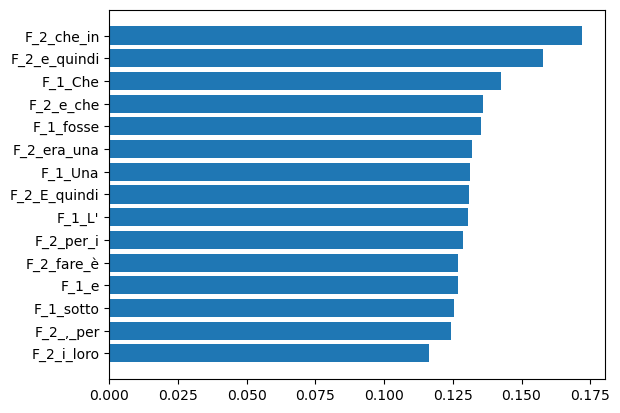

In [22]:
feature_imp_forma = gs.best_estimator_.coef_[0]

coef_list1 = sorted([(feature,coef) for feature,coef in zip(vectorizer_forma.get_feature_names_out(), feature_imp_forma)], key= lambda x: abs(x[1]), reverse=True)
plt.barh(list(reversed([el[0] for el in coef_list1[:15]])),list(reversed([abs(el[1]) for el in coef_list1[:15]])))
plt.show()

## Lemma

### Model Selection

In [23]:
# cerco gli iperparametri C e max_iter migliori con una 10 fold crossvalidation sul training set.
parameters = {
    'C': [0.01, 0.1, 1, 10, 100],  # Parametro di regolarizzazione
    'penalty': ['l2'],
    'dual': [True],  
    'max_iter': [1000, 2000, 3000],
}

clf = LinearSVC()
gs = GridSearchCV(
    clf, 
    parameters, 
    scoring='accuracy', 
    n_jobs=-1,
    refit=True,
    cv=10
    )
gs.fit(X_train_lemma, labels_train)
print(gs.best_estimator_)
print(gs.best_params_)
print(gs.best_score_)

LinearSVC(C=10, dual=True)
{'C': 10, 'dual': True, 'max_iter': 1000, 'penalty': 'l2'}
0.46762499999999996


### Test

In [24]:
y_pred = gs.best_estimator_.predict(X_test_lemma)
print(classification_report(labels_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.51      0.51       400
           1       0.51      0.50      0.50       400

    accuracy                           0.51       800
   macro avg       0.51      0.50      0.50       800
weighted avg       0.51      0.50      0.50       800



### Feature Importance

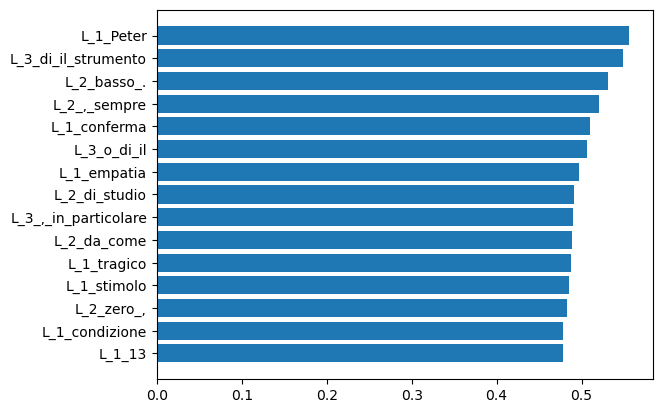

In [25]:
feature_imp_lemma = gs.best_estimator_.coef_[0]

coef_list2 = sorted([(feature,coef) for feature,coef in zip(vectorizer_lemma.get_feature_names_out(), feature_imp_lemma)], key= lambda x: abs(x[1]), reverse=True)
plt.barh(list(reversed([el[0] for el in coef_list2[:15]])),list(reversed([abs(el[1]) for el in coef_list2[:15]])))
plt.show()

## POS

### Model Selection

In [26]:
# cerco gli iperparametri C e max_iter migliori con una 10 fold crossvalidation sul training set.
parameters = {
    'C': [0.01, 0.1, 1, 10, 100],  # Parametro di regolarizzazione
    'penalty': ['l2'],
    'dual': [True],  
    'max_iter': [1000, 2000, 3000],
}

clf = LinearSVC()
gs = GridSearchCV(
    clf, 
    parameters, 
    scoring='accuracy', 
    n_jobs=-1,
    refit=True,
    cv=10
    )
gs.fit(X_train_pos, labels_train)
print(gs.best_estimator_)
print(gs.best_params_)
print(gs.best_score_)

LinearSVC(C=0.01, dual=True)
{'C': 0.01, 'dual': True, 'max_iter': 1000, 'penalty': 'l2'}
0.4857499999999999


### Test

In [27]:
y_pred = gs.best_estimator_.predict(X_test_pos)
print(classification_report(labels_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.54      0.52       400
           1       0.50      0.46      0.48       400

    accuracy                           0.50       800
   macro avg       0.50      0.50      0.50       800
weighted avg       0.50      0.50      0.50       800



### Feature Importance

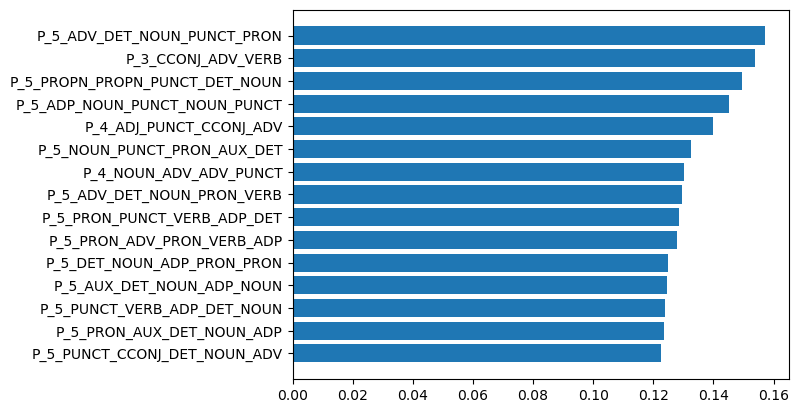

In [28]:
feature_imp_pos = gs.best_estimator_.coef_[0]

coef_list3 = sorted([(feature,coef) for feature,coef in zip(vectorizer_pos.get_feature_names_out(), feature_imp_pos)], key= lambda x: abs(x[1]), reverse=True)
plt.barh(list(reversed([el[0] for el in coef_list3[:15]])),list(reversed([abs(el[1]) for el in coef_list3[:15]])))
plt.show()

## Carattere

### Model Selection

In [29]:
# cerco gli iperparametri C e max_iter migliori con una 10 fold crossvalidation sul training set.
parameters = {
    'C': [0.01, 0.1, 1, 10, 100],  # Parametro di regolarizzazione
    'penalty': ['l2'],
    'dual': [True],  
    'max_iter': [1000, 2000, 3000],
}

clf = LinearSVC()
gs = GridSearchCV(
    clf, 
    parameters, 
    scoring='accuracy', 
    n_jobs=-1,
    refit=True,
    cv=10
    )
gs.fit(X_train_carattere, labels_train)
print(gs.best_estimator_)
print(gs.best_params_)
print(gs.best_score_)

LinearSVC(C=0.01, dual=True)
{'C': 0.01, 'dual': True, 'max_iter': 1000, 'penalty': 'l2'}
0.4977500000000001


### Test

In [30]:
y_pred = gs.best_estimator_.predict(X_test_carattere)
print(classification_report(labels_test, y_pred))

              precision    recall  f1-score   support

           0       0.48      0.47      0.47       400
           1       0.48      0.48      0.48       400

    accuracy                           0.48       800
   macro avg       0.48      0.48      0.48       800
weighted avg       0.48      0.48      0.48       800



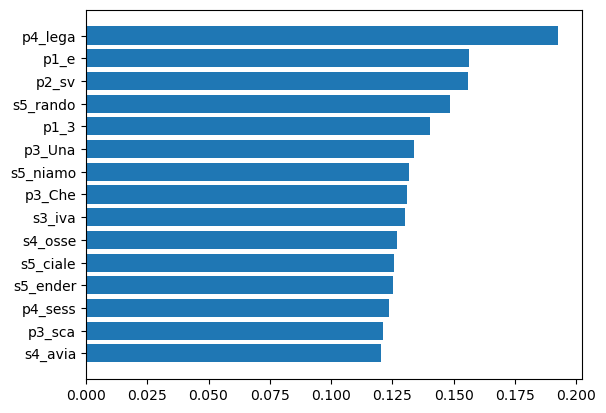

In [32]:
feature_imp_carattere = gs.best_estimator_.coef_[0]

coef_list4 = sorted([(feature,coef) for feature,coef in zip(vectorizer_carattere.get_feature_names_out(), feature_imp_carattere)], key= lambda x: abs(x[1]), reverse=True)
plt.barh(list(reversed([el[0] for el in coef_list4[:15]])),list(reversed([abs(el[1]) for el in coef_list4[:15]])))
plt.show()